In [1]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

df = pd.read_csv("data.csv")

df = df.drop(columns=["Unnamed: 32"], errors="ignore")
df = df.dropna()

df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

TARGET_COLUMN = "diagnosis"

X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649122807017544
Precision: 0.975
Recall: 0.9285714285714286
F1-score: 0.9512195121951219


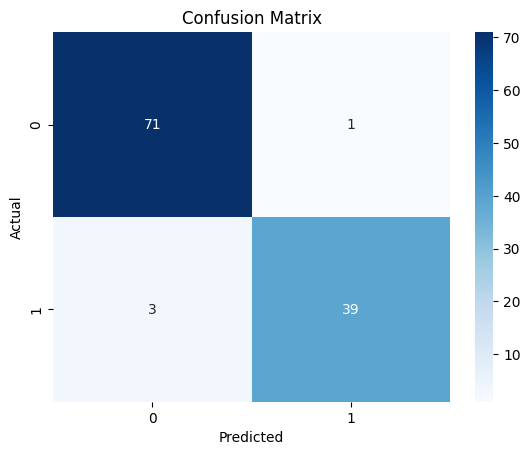

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC-AUC: 0.996031746031746


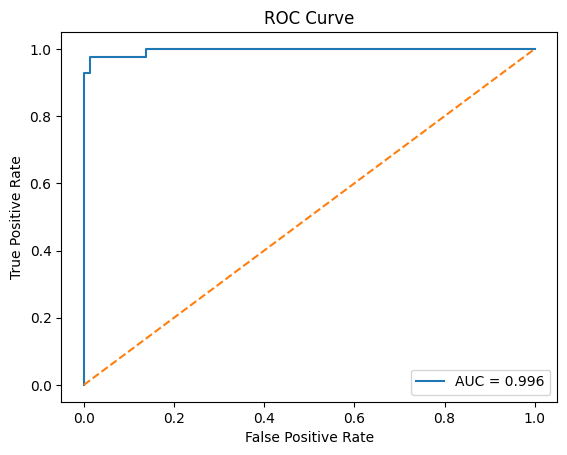

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", auc_score)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

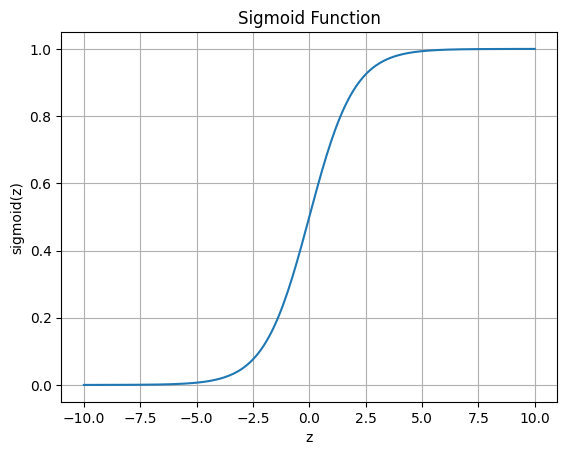

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
sig = sigmoid(z)

plt.figure()
plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()

In [6]:
default_threshold = 0.5
y_pred_default = (y_proba >= default_threshold).astype(int)
print("Default Threshold (0.5):")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("Precision:", precision_score(y_test, y_pred_default, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_default, zero_division=0))

low_threshold = 0.4
y_pred_low = (y_proba >= low_threshold).astype(int)
print("Low Threshold (0.4):")
print("Accuracy:", accuracy_score(y_test, y_pred_low))
print("Precision:", precision_score(y_test, y_pred_low, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_low, zero_division=0))

high_threshold = 0.6
y_pred_high = (y_proba >= high_threshold).astype(int)
print("High Threshold (0.6):")
print("Accuracy:", accuracy_score(y_test, y_pred_high))
print("Precision:", precision_score(y_test, y_pred_high, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_high, zero_division=0))


Default Threshold (0.5):
Accuracy: 0.9649122807017544
Precision: 0.975
Recall: 0.9285714285714286
Low Threshold (0.4):
Accuracy: 0.9736842105263158
Precision: 0.975609756097561
Recall: 0.9523809523809523
High Threshold (0.6):
Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9047619047619048
